In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *
from scipy import stats
from datetime import datetime, date, time, timedelta
s = pd.Series

In [2]:
#ersetze in RET C und B mit nan
missing_values=["C","B","."]

In [4]:
crsp_m = pd.read_csv("./Data/Stockreturn_monthly_1960-2018.csv",na_values=missing_values)
#crsp_m = pd.read_csv("./Data/Test.csv",na_values = missing_values)
#crsp_m = pd.read_csv("./Data/Health Chemi SIC CODE.csv",na_values=missing_values)


crsp_m['date']=[datetime.strptime(str(date), "%Y%m%d")
for date in crsp_m['date']]

print(crsp_m.shape)

crsp_m.head()

(2434282, 7)


,PERMNO,date,SHRCD,EXCHCD,SICCD,PRC,RET
0,10001,1986-09-30,11,3,4920,6.375,-0.003077
1,10001,1986-10-31,11,3,4920,6.625,0.039216
2,10001,1986-11-28,11,3,4920,7.000,0.056604
3,10001,1986-12-31,11,3,4920,7.000,0.015000
4,10001,1987-01-30,11,3,4920,6.750,-0.035714


In [5]:
crsp_m[['PERMNO','SHRCD','EXCHCD']] = crsp_m[['PERMNO', 'SHRCD','EXCHCD']].astype(int)


In [6]:
crsp_m['RET']=crsp_m['RET'].fillna(0)

In [7]:
crsp_m['logret']=np.log(1+crsp_m['RET'])

In [8]:
crsp_m['logret+1']=crsp_m['logret']+1

In [9]:
crsp_m['MktV'] = crsp_m['SHRCD']*crsp_m['PRC']

In [10]:
print (crsp_m)

         PERMNO       date  SHRCD  EXCHCD SICCD        PRC       RET  \
0         10001 1986-09-30     11       3  4920    6.37500 -0.003077   
1         10001 1986-10-31     11       3  4920    6.62500  0.039216   
2         10001 1986-11-28     11       3  4920    7.00000  0.056604   
3         10001 1986-12-31     11       3  4920    7.00000  0.015000   
4         10001 1987-01-30     11       3  4920    6.75000 -0.035714   
5         10001 1987-02-27     11       3  4920    6.25000 -0.074074   
6         10001 1987-03-31     11       3  4920    6.37500  0.036800   
7         10001 1987-06-30     11       3  4920    5.87500  0.051429   
8         10001 1987-07-31     11       3  4920    6.00000  0.021277   
9         10001 1987-08-31     11       3  4920    6.50000  0.083333   
10        10001 1987-09-30     11       3  4920    6.25000 -0.022308   
11        10001 1987-10-30     11       3  4920    6.37500  0.020000   
12        10001 1987-11-30     11       3  4920    6.18750 -0.02

In [11]:
#crsp_m.pivot(index='date',columns='PERMNO')

In [12]:
#piv1=crsp_m.pivot(index='date',columns='PERMNO',values= ['logret','MktV'])

In [13]:
pivm=crsp_m.pivot(index='date',columns='PERMNO',values= ['logret'])

In [14]:
print(pivm) 

              logret                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29       NaN   NaN   NaN  0.005142   NaN   NaN   NaN   NaN   NaN   
1960-02-29       NaN   NaN   NaN  0.045121   NaN   NaN   NaN   NaN   NaN   
1960-03-31       NaN   NaN   NaN -0.061400   NaN   NaN   NaN   NaN   NaN   
1960-04-29       NaN   NaN   NaN -0.085334   NaN   NaN   NaN   NaN   NaN   
1960-05-31       NaN   NaN   NaN  0.047695   NaN   NaN   NaN   NaN   NaN   
1960-06-30       NaN   NaN   NaN  0.027399   NaN   NaN   NaN   NaN   NaN   
1960-07-29       NaN   NaN   NaN -0.013606   NaN   NaN   NaN   NaN   NaN   
1960-08-31       NaN   NaN   NaN -0.022162   NaN   NaN   NaN   NaN   NaN   
1960-09-30       NaN   NaN   NaN -0.153204   NaN   NaN   NaN   NaN   NaN   
1960-10-31       NaN   NaN   NaN -0.013333   NaN   NaN   NaN   NaN   NaN   
1960-11-30  

In [15]:
#pivm.to_excel(r'Health&Chemi SIC CODE.xlsx')

In [16]:
CR_df = pivm.copy()

In [17]:
CR_df_columns = pivm.columns
CR_df_index = pivm.index.to_series()
CR_df = pd.DataFrame(index=CR_df_index, dtype=float, columns=CR_df_columns)

In [18]:
leni=len(CR_df_index)
lenj=len(CR_df_columns)

In [19]:
null_matrix = pivm.isna()

In [20]:
#If observations i all 13 months are available

#null_matrix = pivm.isna().to_numpy()
#for i in range(leni):
#        col_index = np.sum(null_matrix[i-12:i,:], axis=0) ==0   
#    #pivm.iloc[i-12:i-2, col_index]
#        CR_df.iloc[i, col_index] = np.sum(pivm.iloc[i-12:i-2,col_index], axis=0)

In [78]:
#If at least 8 observations in last 12 month are available

null_matrix = pivm.isna().to_numpy()
for i in range(leni):
        col_index = (np.sum(null_matrix[i-1:i,:], axis=0) ==0) & (np.sum(null_matrix[i-12:i,:], axis=0) < 4)
        #pivm.iloc[i-12:i-2, col_index]
        CR_df.iloc[i, col_index] = np.sum(pivm.iloc[i-12:i-2,col_index], axis=0)

KeyboardInterrupt: 

In [22]:
print(null_matrix)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]
 [ True  True  True ... False  True False]]


In [23]:
#for i in range(leni):
#
 #   for j in range(lenj):
  #      if np.sum(pivm.iloc[i:i-12,j].isna()) > 0:
   #         continue #0 wenn kein mal wert fehlen darf, 2 wenn max 2 mal wert fehlen darf
    #    else:
     #       CR_df.iloc[i,j] = np.sum(pivm.iloc[i-12:i-2,j])

In [24]:
print (CR_df)

              logret                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-02-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-03-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-04-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-05-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-06-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-07-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-08-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-09-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-10-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-11-30  

In [25]:
PT_df = CR_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis=1).transpose()
PT_df.columns = ['Percentile 10','Percentile 20','Percentile 30','Percentile 40','Percentile 50','Percentile 60','Percentile 70','Percentile 80','Percentile 90']

In [26]:
PT_winner_df =CR_df.quantile([0.9], axis=1).transpose()
PT_winner_df.columns = ['Percentile 90']

In [27]:
PT_looser_df=CR_df.quantile([0.1], axis=1).transpose()
PT_looser_df.columns = ['Percentile 10']

In [28]:
print(PT_winner_df)
print(PT_looser_df)

            Percentile 90
date                     
1960-01-29       0.000000
1960-02-29       0.000000
1960-03-31       0.000000
1960-04-29       0.000000
1960-05-31       0.000000
1960-06-30       0.000000
1960-07-29       0.000000
1960-08-31       0.000000
1960-09-30       0.000000
1960-10-31       0.000000
1960-11-30       0.000000
1960-12-30       0.000000
1961-01-31       0.191860
1961-02-28       0.288316
1961-03-30       0.282912
1961-04-28       0.374564
1961-05-31       0.442790
1961-06-30       0.465539
1961-07-31       0.467556
1961-08-31       0.510726
1961-09-29       0.425539
1961-10-31       0.494327
1961-11-30       0.552744
1961-12-29       0.447640
1962-01-31       0.440102
1962-02-28       0.435074
1962-03-30       0.336603
1962-04-30       0.262195
1962-05-31       0.272824
1962-06-29       0.238518
...                   ...
2016-07-29       0.223811
2016-08-31       0.235553
2016-09-30       0.298538
2016-10-31       0.399599
2016-11-30       0.342419
2016-12-30  

In [29]:
#CR_df.to_csv(r'CR_df.csv')

In [30]:
top_ninety=PT_df['Percentile 90'].to_numpy()
true_table = CR_df.ge(top_ninety, axis=0)

In [31]:
print(true_table)

           logret                                                          \
PERMNO      10001  10002  10003  10006  10008  10009  10010  10011  10012   
date                                                                        
1960-01-29   True   True   True   True   True   True   True   True   True   
1960-02-29  False  False  False   True  False  False  False  False  False   
1960-03-31  False  False  False   True  False  False  False  False  False   
1960-04-29  False  False  False   True  False  False  False  False  False   
1960-05-31  False  False  False   True  False  False  False  False  False   
1960-06-30  False  False  False   True  False  False  False  False  False   
1960-07-29  False  False  False   True  False  False  False  False  False   
1960-08-31  False  False  False   True  False  False  False  False  False   
1960-09-30  False  False  False   True  False  False  False  False  False   
1960-10-31  False  False  False   True  False  False  False  False  False   

In [32]:
CR_df[true_table]

logret                                                      \
PERMNO         10001 10002 10003     10006 10008 10009 10010 10011 10012   
date                                                                       
1960-01-29  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1960-02-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-03-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-04-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-05-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-06-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-07-29       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-08-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-09-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-10-31       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-11-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1960-12-30       NaN   NaN   NaN  0.000000   NaN   NaN   NaN   NaN   NaN   
1961-01-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-03-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-04-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-05-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-06-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-07-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-08-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-09-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-10-31       NaN   NaN   NaN  0.498784   NaN   NaN   NaN   NaN   NaN   
1961-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1961-12-29       NaN   NaN   NaN  0.480832   NaN   NaN   NaN   NaN   NaN   
1962-01-31       NaN   NaN   NaN  0.489943   NaN   NaN   NaN   NaN   NaN   
1962-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1962-03-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
1962-04-30       NaN   NaN   NaN  0.318566   NaN   NaN   NaN   NaN   NaN   
1962-05-31       NaN   NaN   NaN  0.307907   NaN   NaN   NaN   NaN   NaN   
1962-06-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
...              ...   ...   ...       ...   ...   ...   ...   ...   ...   
2016-07-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-08-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-09-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2016-12-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-31  0.532228   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-02-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-03-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-04-28       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-05-31  0.572304   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-06-30  0.604299   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-07-31  0.609657   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-08-31  0.599409   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-09-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-10-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-11-30       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2017-12-29       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   
2018-01-31       NaN   NaN   NaN       NaN   NaN   NaN   NaN  

In [33]:
np.sum(pivm[true_table], axis=1)

date
1960-01-29   -40.008840
1960-02-29     6.773235
1960-03-31   -25.867737
1960-04-29   -21.701787
1960-05-31    24.718828
1960-06-30    19.182020
1960-07-29   -21.833354
1960-08-31    32.533155
1960-09-30   -63.560756
1960-10-31   -26.200058
1960-11-30    44.168465
1960-12-30    37.616640
1961-01-31     4.191291
1961-02-28     8.564000
1961-03-30     7.588934
1961-04-28     1.974672
1961-05-31     1.532497
1961-06-30    -5.798598
1961-07-31     0.416737
1961-08-31     3.335140
1961-09-29    -3.884269
1961-10-31     4.655512
1961-11-30     7.227605
1961-12-29    -2.807212
1962-01-31    -3.845543
1962-02-28     0.171725
1962-03-30    -0.795973
1962-04-30    -6.762586
1962-05-31   -12.026549
1962-06-29    -7.073662
                ...    
2016-07-29    15.366306
2016-08-31    -2.121255
2016-09-30     7.749222
2016-10-31   -24.977824
2016-11-30    27.870554
2016-12-30    -2.204940
2017-01-31     4.569558
2017-02-28    -1.073627
2017-03-31    -3.117016
2017-04-28    -1.719943
2017-05-31 

In [34]:
np.sum(true_table, axis=1)

date
1960-01-29    18117
1960-02-29      947
1960-03-31     1008
1960-04-29      996
1960-05-31     1001
1960-06-30     1018
1960-07-29     1018
1960-08-31     1001
1960-09-30     1013
1960-10-31     1026
1960-11-30     1016
1960-12-30     1030
1961-01-31       98
1961-02-28       98
1961-03-30      100
1961-04-28      100
1961-05-31      100
1961-06-30      102
1961-07-31      100
1961-08-31      100
1961-09-29      100
1961-10-31      100
1961-11-30      101
1961-12-29      102
1962-01-31      104
1962-02-28      102
1962-03-30      101
1962-04-30      102
1962-05-31      104
1962-06-29      105
              ...  
2016-07-29      329
2016-08-31      326
2016-09-30      326
2016-10-31      324
2016-11-30      321
2016-12-30      322
2017-01-31      321
2017-02-28      322
2017-03-31      323
2017-04-28      324
2017-05-31      322
2017-06-30      322
2017-07-31      323
2017-08-31      324
2017-09-29      324
2017-10-31      323
2017-11-30      321
2017-12-29      321
2018-01-31     

In [35]:
winner = np.sum(pivm[true_table], axis=1)/np.sum(true_table, axis=1)
winner[0:12] = 0

In [36]:
print (winner)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31    0.042768
1961-02-28    0.087388
1961-03-30    0.075889
1961-04-28    0.019747
1961-05-31    0.015325
1961-06-30   -0.056849
1961-07-31    0.004167
1961-08-31    0.033351
1961-09-29   -0.038843
1961-10-31    0.046555
1961-11-30    0.071560
1961-12-29   -0.027522
1962-01-31   -0.036976
1962-02-28    0.001684
1962-03-30   -0.007881
1962-04-30   -0.066300
1962-05-31   -0.115640
1962-06-29   -0.067368
                ...   
2016-07-29    0.046706
2016-08-31   -0.006507
2016-09-30    0.023771
2016-10-31   -0.077092
2016-11-30    0.086824
2016-12-30   -0.006848
2017-01-31    0.014235
2017-02-28   -0.003334
2017-03-31   -0.009650
2017-04-28   -0.005308
2017-05-31   -0.027733
2017-06-30    0.018298
2017-0

In [37]:
bottom_ten=PT_df['Percentile 10'].to_numpy()
true_table2 = CR_df.le(bottom_ten, axis=0)

In [38]:
print(true_table2)

           logret                                                          \
PERMNO      10001  10002  10003  10006  10008  10009  10010  10011  10012   
date                                                                        
1960-01-29  False  False  False  False  False  False  False  False  False   
1960-02-29  False  False  False   True  False  False  False  False  False   
1960-03-31  False  False  False   True  False  False  False  False  False   
1960-04-29  False  False  False   True  False  False  False  False  False   
1960-05-31  False  False  False   True  False  False  False  False  False   
1960-06-30  False  False  False   True  False  False  False  False  False   
1960-07-29  False  False  False   True  False  False  False  False  False   
1960-08-31  False  False  False   True  False  False  False  False  False   
1960-09-30  False  False  False   True  False  False  False  False  False   
1960-10-31  False  False  False   True  False  False  False  False  False   

In [39]:
CR_df[true_table2]

logret                                                            \
PERMNO      10001 10002 10003 10006 10008 10009 10010 10011 10012     10014   
date                                                                          
1960-01-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1960-02-29    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-03-31    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-04-29    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-05-31    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-06-30    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-07-29    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-08-31    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-09-30    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-10-31    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-11-30    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1960-12-30    NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  0.000000   
1961-01-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-02-28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-03-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.340927   
1961-04-28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.271934   
1961-05-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-06-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.120628   
1961-07-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.105361   
1961-08-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-09-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-10-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-11-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1961-12-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-01-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-02-28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-03-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-04-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-05-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1962-06-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...       ...   
2016-07-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-08-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-09-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-10-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-11-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2016-12-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-01-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-02-28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-03-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-04-28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-05-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-06-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-07-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-08-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-09-29    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-10-31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2017-11-30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [40]:
np.sum(pivm[true_table2], axis=1)

date
1960-01-29    -3.849268
1960-02-29     6.098015
1960-03-31   -25.867737
1960-04-29   -21.701787
1960-05-31    24.718828
1960-06-30    19.182020
1960-07-29   -21.833354
1960-08-31    32.533155
1960-09-30   -63.560756
1960-10-31   -26.200058
1960-11-30    44.168465
1960-12-30    37.616640
1961-01-31    11.659880
1961-02-28     7.205875
1961-03-30     4.454126
1961-04-28    -2.301641
1961-05-31     5.235424
1961-06-30    -6.750916
1961-07-31    -0.849369
1961-08-31     1.754591
1961-09-29    -5.985625
1961-10-31    -0.735415
1961-11-30     4.306004
1961-12-29     0.450664
1962-01-31    -0.928421
1962-02-28     0.807302
1962-03-30    -3.904090
1962-04-30    -9.446971
1962-05-31   -14.581769
1962-06-29   -14.897298
                ...    
2016-07-29    21.044043
2016-08-31     9.295977
2016-09-30    16.871105
2016-10-31   -41.536226
2016-11-30    19.010266
2016-12-30     1.944495
2017-01-31     3.300328
2017-02-28     4.652856
2017-03-31     0.214019
2017-04-28   -10.152130
2017-05-31 

In [41]:
np.sum(true_table2, axis=1)

date
1960-01-29    2022
1960-02-29     956
1960-03-31    1008
1960-04-29     996
1960-05-31    1001
1960-06-30    1018
1960-07-29    1018
1960-08-31    1001
1960-09-30    1013
1960-10-31    1026
1960-11-30    1016
1960-12-30    1030
1961-01-31      98
1961-02-28      98
1961-03-30     100
1961-04-28     100
1961-05-31     100
1961-06-30     102
1961-07-31     100
1961-08-31     100
1961-09-29     100
1961-10-31     100
1961-11-30     101
1961-12-29     102
1962-01-31     104
1962-02-28     102
1962-03-30     101
1962-04-30     102
1962-05-31     104
1962-06-29     105
              ... 
2016-07-29     329
2016-08-31     326
2016-09-30     326
2016-10-31     324
2016-11-30     321
2016-12-30     322
2017-01-31     321
2017-02-28     322
2017-03-31     323
2017-04-28     324
2017-05-31     322
2017-06-30     322
2017-07-31     323
2017-08-31     324
2017-09-29     324
2017-10-31     323
2017-11-30     321
2017-12-29     321
2018-01-31     323
2018-02-28     323
2018-03-29     323
2018-04

In [42]:
loser = np.sum(pivm[true_table2], axis=1)/np.sum(true_table2, axis=1)
loser[0:12] = 0

In [43]:
print(loser)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31    0.118978
1961-02-28    0.073529
1961-03-30    0.044541
1961-04-28   -0.023016
1961-05-31    0.052354
1961-06-30   -0.066185
1961-07-31   -0.008494
1961-08-31    0.017546
1961-09-29   -0.059856
1961-10-31   -0.007354
1961-11-30    0.042634
1961-12-29    0.004418
1962-01-31   -0.008927
1962-02-28    0.007915
1962-03-30   -0.038654
1962-04-30   -0.092617
1962-05-31   -0.140209
1962-06-29   -0.141879
                ...   
2016-07-29    0.063964
2016-08-31    0.028515
2016-09-30    0.051752
2016-10-31   -0.128198
2016-11-30    0.059222
2016-12-30    0.006039
2017-01-31    0.010281
2017-02-28    0.014450
2017-03-31    0.000663
2017-04-28   -0.031334
2017-05-31   -0.074468
2017-06-30    0.047653
2017-0

In [44]:
momentum = winner - loser


In [45]:
print (momentum)

date
1960-01-29    0.000000
1960-02-29    0.000000
1960-03-31    0.000000
1960-04-29    0.000000
1960-05-31    0.000000
1960-06-30    0.000000
1960-07-29    0.000000
1960-08-31    0.000000
1960-09-30    0.000000
1960-10-31    0.000000
1960-11-30    0.000000
1960-12-30    0.000000
1961-01-31   -0.076210
1961-02-28    0.013858
1961-03-30    0.031348
1961-04-28    0.042763
1961-05-31   -0.037029
1961-06-30    0.009336
1961-07-31    0.012661
1961-08-31    0.015805
1961-09-29    0.021014
1961-10-31    0.053909
1961-11-30    0.028927
1961-12-29   -0.031940
1962-01-31   -0.028049
1962-02-28   -0.006231
1962-03-30    0.030773
1962-04-30    0.026318
1962-05-31    0.024569
1962-06-29    0.074511
                ...   
2016-07-29   -0.017258
2016-08-31   -0.035022
2016-09-30   -0.027981
2016-10-31    0.051106
2016-11-30    0.027602
2016-12-30   -0.012886
2017-01-31    0.003954
2017-02-28   -0.017784
2017-03-31   -0.010313
2017-04-28    0.026025
2017-05-31    0.046735
2017-06-30   -0.029355
2017-0

In [46]:
# Descriptive Information of created Allocation0 DataFrame
#print(momentum.info())
print(momentum.head(7))
print(momentum.tail(7))
print(momentum.shape)

date
1960-01-29    0.0
1960-02-29    0.0
1960-03-31    0.0
1960-04-29    0.0
1960-05-31    0.0
1960-06-30    0.0
1960-07-29    0.0
dtype: float64
date
2018-06-29   -0.007548
2018-07-31    0.030443
2018-08-31    0.072632
2018-09-28   -0.022491
2018-10-31    0.027243
2018-11-30   -0.007129
2018-12-31    0.029524
dtype: float64
(708,)


count    708.000000
mean       0.015164
std        0.052402
min       -0.309212
25%       -0.007873
50%        0.017489
75%        0.043289
max        0.259904
dtype: float64

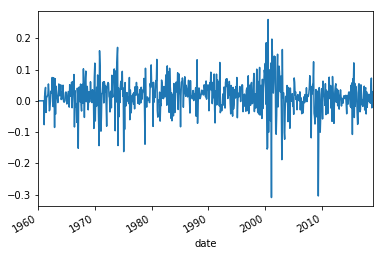

In [47]:
momentum.plot()
momentum.describe()

count    708.000000
mean       0.005423
std        0.070878
min       -0.406964
25%       -0.028852
50%        0.010727
75%        0.048160
max        0.257649
dtype: float64

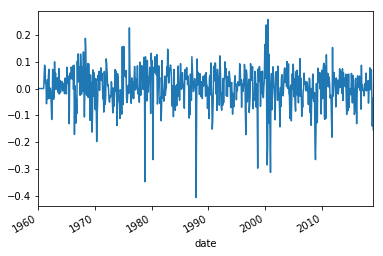

In [48]:
winner.plot()
winner.describe()

count    708.000000
mean      -0.009742
std        0.078443
min       -0.357778
25%       -0.051237
50%       -0.005598
75%        0.033717
max        0.365214
dtype: float64

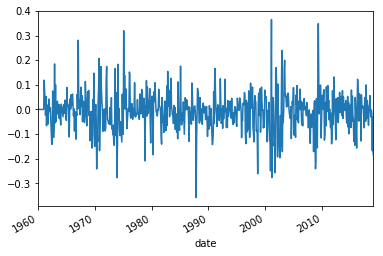

In [49]:
loser.plot()
loser.describe()

In [50]:
winner1= winner +1
loser1 = loser + 1
momentum1=momentum +1


In [51]:
print (momentum1)

date
1960-01-29    1.000000
1960-02-29    1.000000
1960-03-31    1.000000
1960-04-29    1.000000
1960-05-31    1.000000
1960-06-30    1.000000
1960-07-29    1.000000
1960-08-31    1.000000
1960-09-30    1.000000
1960-10-31    1.000000
1960-11-30    1.000000
1960-12-30    1.000000
1961-01-31    0.923790
1961-02-28    1.013858
1961-03-30    1.031348
1961-04-28    1.042763
1961-05-31    0.962971
1961-06-30    1.009336
1961-07-31    1.012661
1961-08-31    1.015805
1961-09-29    1.021014
1961-10-31    1.053909
1961-11-30    1.028927
1961-12-29    0.968060
1962-01-31    0.971951
1962-02-28    0.993769
1962-03-30    1.030773
1962-04-30    1.026318
1962-05-31    1.024569
1962-06-29    1.074511
                ...   
2016-07-29    0.982742
2016-08-31    0.964978
2016-09-30    0.972019
2016-10-31    1.051106
2016-11-30    1.027602
2016-12-30    0.987114
2017-01-31    1.003954
2017-02-28    0.982216
2017-03-31    0.989687
2017-04-28    1.026025
2017-05-31    1.046735
2017-06-30    0.970645
2017-0

In [52]:
cumulative_momentum_df =momentum1.copy()
cumulative_momentum_df = cumulative_momentum_df.iloc[11:]
cumulative_momentum_df = s.cumprod(cumulative_momentum_df)


In [53]:
print (cumulative_momentum_df)

date
1960-12-30        1.000000
1961-01-31        0.923790
1961-02-28        0.936592
1961-03-30        0.965953
1961-04-28        1.007260
1961-05-31        0.969962
1961-06-30        0.979018
1961-07-31        0.991413
1961-08-31        1.007083
1961-09-29        1.028245
1961-10-31        1.083677
1961-11-30        1.115024
1961-12-29        1.079411
1962-01-31        1.049134
1962-02-28        1.042597
1962-03-30        1.074681
1962-04-30        1.102964
1962-05-31        1.130063
1962-06-29        1.214265
1962-07-31        1.209785
1962-08-31        1.187374
1962-09-28        1.275202
1962-10-31        1.318288
1962-11-30        1.206028
1962-12-31        1.291578
1963-01-31        1.236391
1963-02-28        1.294407
1963-03-29        1.335414
1963-04-30        1.353257
1963-05-31        1.362086
                  ...     
2016-07-29    12842.080524
2016-08-31    12392.322843
2016-09-30    12045.570314
2016-10-31    12661.173393
2016-11-30    13010.648944
2016-12-30    12842.987

In [54]:
cumulative_winner_df = winner1.copy()
cumulative_winner_df = cumulative_winner_df.iloc[11:]
cumulative_winner_df = s.cumprod(cumulative_winner_df)

In [55]:
cumulative_loser_df = loser1.copy()
cumulative_loser_df = cumulative_loser_df.iloc[11:]
cumulative_loser_df = s.cumprod(cumulative_loser_df)

In [56]:
print (cumulative_winner_df)

date
1960-12-30     1.000000
1961-01-31     1.042768
1961-02-28     1.133893
1961-03-30     1.219944
1961-04-28     1.244034
1961-05-31     1.263099
1961-06-30     1.191293
1961-07-31     1.196257
1961-08-31     1.236154
1961-09-29     1.188139
1961-10-31     1.243452
1961-11-30     1.332434
1961-12-29     1.295764
1962-01-31     1.247851
1962-02-28     1.249952
1962-03-30     1.240101
1962-04-30     1.157883
1962-05-31     1.023985
1962-06-29     0.955001
1962-07-31     1.023233
1962-08-31     1.047180
1962-09-28     1.005106
1962-10-31     0.977672
1962-11-30     1.075149
1962-12-31     1.091693
1963-01-31     1.154974
1963-02-28     1.151087
1963-03-29     1.190774
1963-04-30     1.231831
1963-05-31     1.281386
                ...    
2016-07-29     8.671525
2016-08-31     8.615100
2016-09-30     8.819886
2016-10-31     8.139943
2016-11-30     8.846687
2016-12-30     8.786108
2017-01-31     8.911181
2017-02-28     8.881469
2017-03-31     8.795761
2017-04-28     8.749069
2017-05-31 

In [57]:
print (cumulative_loser_df)

date
1960-12-30    1.000000
1961-01-31    1.118978
1961-02-28    1.201256
1961-03-30    1.254762
1961-04-28    1.225881
1961-05-31    1.290062
1961-06-30    1.204678
1961-07-31    1.194446
1961-08-31    1.215404
1961-09-29    1.142654
1961-10-31    1.134251
1961-11-30    1.182608
1961-12-29    1.187833
1962-01-31    1.177229
1962-02-28    1.186547
1962-03-30    1.140682
1962-04-30    1.035035
1962-05-31    0.889913
1962-06-29    0.763653
1962-07-31    0.821031
1962-08-31    0.855455
1962-09-28    0.757809
1962-10-31    0.711520
1962-11-30    0.843050
1962-12-31    0.796221
1963-01-31    0.876396
1963-02-28    0.832323
1963-03-29    0.834652
1963-04-30    0.852278
1963-05-31    0.881003
                ...   
2016-07-29    0.000164
2016-08-31    0.000169
2016-09-30    0.000178
2016-10-31    0.000155
2016-11-30    0.000164
2016-12-30    0.000165
2017-01-31    0.000167
2017-02-28    0.000169
2017-03-31    0.000170
2017-04-28    0.000164
2017-05-31    0.000152
2017-06-30    0.000159
2017-0

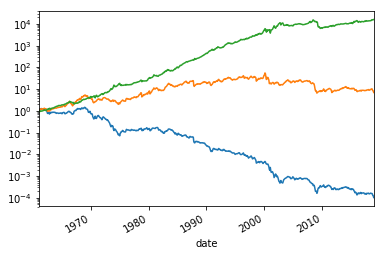

In [58]:
plt.yscale('log')
cumulative_loser_df.plot() #blue
cumulative_winner_df.plot() #orange
cumulative_momentum_df.plot() #green

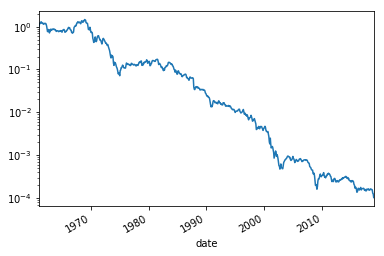

In [59]:
plt.yscale('log')
cumulative_loser_df.plot()

In [60]:
cumulative_loser_df.describe()

count    697.000000
mean       0.214714
std        0.361115
min        0.000103
25%        0.000781
50%        0.026117
75%        0.151808
max        1.461983
dtype: float64

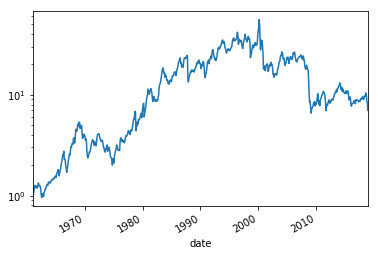

In [61]:
plt.yscale('log')
cumulative_winner_df.plot()

In [62]:
cumulative_winner_df.describe()

count    697.000000
mean      13.680279
std       10.530946
min        0.955001
25%        3.942632
50%       10.341860
75%       21.350732
max       55.794226
dtype: float64

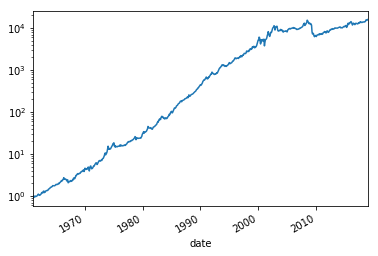

In [63]:
plt.yscale('log')
cumulative_momentum_df.plot()

In [64]:
cumulative_momentum_df.describe()

count      697.000000
mean      3551.074902
std       4707.361521
min          0.923790
25%         15.553039
50%        436.094679
75%       7940.075642
max      15974.584358
dtype: float64

In [65]:
FF3_df = pd.read_csv("./data/FF_3_Factors_monthly.csv",delimiter=';')
headers = FF3_df.iloc[0]
#FF3_df.columns = ['Date' if x=='Unnamed: 0' else  x for x in FF3_df.columns]

FF3_df.reset_index()
FF3_df.index=(pivm.index)


In [66]:

#FF3_df['date']=[datetime.strptime(str(date), "%Y%m")
#for date in FF3_df['date']]
#CR_df_index = pivm.index.to_series()

#FF3_df_columns = FF3_df.columns
#FF3_df_index = pivm.index.to_series()
#FF3_df_new = pd.DataFrame(index=FF3_df_index, dtype=float, columns=FF3_df_columns)

#FF3_df_new = pd.concat([FF3_df_new,FF3_df])
#FF3_df_new('Mkt-RF','SMB','HML','RF') = FF3_df('Mkt-RF','SMB','HML','RF')

In [67]:
print(FF3_df)

            Mkt-RF   SMB   HML    RF
date                                
1960-01-29   -6.98  2.09  2.73  0.33
1960-02-29    1.17  0.51 -1.99  0.29
1960-03-31   -1.63 -0.51 -2.85  0.35
1960-04-29   -1.71  0.31 -2.23  0.19
1960-05-31    3.12  1.21 -3.76  0.27
1960-06-30    2.08 -0.22 -0.34  0.24
1960-07-29   -2.37 -0.52  2.03  0.13
1960-08-31    3.01  0.90 -0.19  0.17
1960-09-30   -5.99 -1.11  1.58  0.16
1960-10-31   -0.71 -3.95  2.60  0.22
1960-11-30    4.69  0.35 -2.45  0.13
1960-12-30    4.71 -1.56 -0.79  0.16
1961-01-31    6.20  0.66  3.70  0.19
1961-02-28    3.57  3.98 -0.74  0.14
1961-03-30    2.89  3.27 -0.77  0.20
1961-04-28    0.29  0.10  2.05  0.17
1961-05-31    2.40  1.95  0.48  0.18
1961-06-30   -3.08 -2.47 -0.18  0.20
1961-07-31    2.83 -1.88 -0.11  0.18
1961-08-31    2.57 -1.75 -0.28  0.14
1961-09-29   -2.15 -1.05 -0.58  0.17
1961-10-31    2.57 -1.61  0.12  0.19
1961-11-30    4.45  1.24 -1.19  0.15
1961-12-29   -0.18 -0.83  1.83  0.19
1962-01-31   -3.87  1.78  5.09  0.24
1

In [68]:
Mkt = (FF3_df['RF']/100)+(FF3_df['Mkt-RF']/100)
Mkt[0:12] = 0
Mkt_1 = Mkt+1

RF= FF3_df['RF']/100
RF[0:12] = 0
RF_1=RF+1

Mkt_RF=(FF3_df['Mkt-RF']/100)
Mkt_RF[0:12] = 0 
Mkt_RF_1=Mkt_RF+1

In [69]:
print(RF_1)

date
1960-01-29    1.0000
1960-02-29    1.0000
1960-03-31    1.0000
1960-04-29    1.0000
1960-05-31    1.0000
1960-06-30    1.0000
1960-07-29    1.0000
1960-08-31    1.0000
1960-09-30    1.0000
1960-10-31    1.0000
1960-11-30    1.0000
1960-12-30    1.0000
1961-01-31    1.0019
1961-02-28    1.0014
1961-03-30    1.0020
1961-04-28    1.0017
1961-05-31    1.0018
1961-06-30    1.0020
1961-07-31    1.0018
1961-08-31    1.0014
1961-09-29    1.0017
1961-10-31    1.0019
1961-11-30    1.0015
1961-12-29    1.0019
1962-01-31    1.0024
1962-02-28    1.0020
1962-03-30    1.0020
1962-04-30    1.0022
1962-05-31    1.0024
1962-06-29    1.0020
               ...  
2016-07-29    1.0002
2016-08-31    1.0002
2016-09-30    1.0002
2016-10-31    1.0002
2016-11-30    1.0001
2016-12-30    1.0003
2017-01-31    1.0004
2017-02-28    1.0004
2017-03-31    1.0003
2017-04-28    1.0005
2017-05-31    1.0006
2017-06-30    1.0006
2017-07-31    1.0007
2017-08-31    1.0009
2017-09-29    1.0009
2017-10-31    1.0009
2017-11-

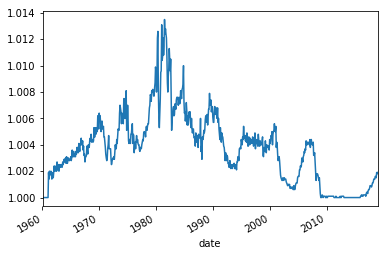

In [70]:
RF_1.plot()

In [71]:
print(Mkt_RF_1)

date
1960-01-29    1.0000
1960-02-29    1.0000
1960-03-31    1.0000
1960-04-29    1.0000
1960-05-31    1.0000
1960-06-30    1.0000
1960-07-29    1.0000
1960-08-31    1.0000
1960-09-30    1.0000
1960-10-31    1.0000
1960-11-30    1.0000
1960-12-30    1.0000
1961-01-31    1.0620
1961-02-28    1.0357
1961-03-30    1.0289
1961-04-28    1.0029
1961-05-31    1.0240
1961-06-30    0.9692
1961-07-31    1.0283
1961-08-31    1.0257
1961-09-29    0.9785
1961-10-31    1.0257
1961-11-30    1.0445
1961-12-29    0.9982
1962-01-31    0.9613
1962-02-28    1.0181
1962-03-30    0.9932
1962-04-30    0.9341
1962-05-31    0.9135
1962-06-29    0.9153
               ...  
2016-07-29    1.0395
2016-08-31    1.0050
2016-09-30    1.0025
2016-10-31    0.9798
2016-11-30    1.0486
2016-12-30    1.0182
2017-01-31    1.0194
2017-02-28    1.0357
2017-03-31    1.0017
2017-04-28    1.0109
2017-05-31    1.0106
2017-06-30    1.0078
2017-07-31    1.0187
2017-08-31    1.0016
2017-09-29    1.0251
2017-10-31    1.0225
2017-11-

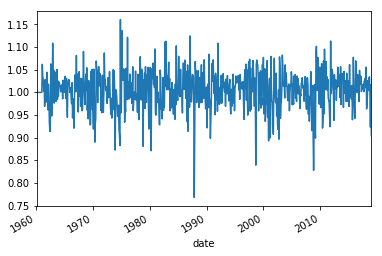

In [82]:
Mkt_RF_1.plot()


In [73]:
cumulative_RF_df = RF_1.copy()
cumulative_RF_df = cumulative_RF_df.iloc[11:]
cumulative_RF_df = s.cumprod(cumulative_RF_df)
print(cumulative_RF_df)


date
1960-12-30     1.000000
1961-01-31     1.001900
1961-02-28     1.003303
1961-03-30     1.005309
1961-04-28     1.007018
1961-05-31     1.008831
1961-06-30     1.010849
1961-07-31     1.012668
1961-08-31     1.014086
1961-09-29     1.015810
1961-10-31     1.017740
1961-11-30     1.019266
1961-12-29     1.021203
1962-01-31     1.023654
1962-02-28     1.025701
1962-03-30     1.027753
1962-04-30     1.030014
1962-05-31     1.032486
1962-06-29     1.034551
1962-07-31     1.037344
1962-08-31     1.039730
1962-09-28     1.041913
1962-10-31     1.044518
1962-11-30     1.046607
1962-12-31     1.049014
1963-01-31     1.051637
1963-02-28     1.054056
1963-03-29     1.056480
1963-04-30     1.059121
1963-05-31     1.061663
                ...    
2016-07-29    13.103624
2016-08-31    13.106244
2016-09-30    13.108866
2016-10-31    13.111487
2016-11-30    13.112799
2016-12-30    13.116732
2017-01-31    13.121979
2017-02-28    13.127228
2017-03-31    13.131166
2017-04-28    13.137732
2017-05-31 

In [74]:
cumulative_Mkt_RF_df = Mkt_RF_1.copy()
cumulative_Mkt_RF_df = cumulative_Mkt_RF_df.iloc[11:]
cumulative_Mkt_RF_df = s.cumprod(cumulative_Mkt_RF_df)
print(cumulative_Mkt_RF_df)

cumulative_Mkt_df = Mkt_1.copy()
cumulative_Mkt_df = cumulative_Mkt_df.iloc[11:]
cumulative_Mkt_df = s.cumprod(cumulative_Mkt_df)

date
1960-12-30     1.000000
1961-01-31     1.062000
1961-02-28     1.099913
1961-03-30     1.131701
1961-04-28     1.134983
1961-05-31     1.162222
1961-06-30     1.126426
1961-07-31     1.158304
1961-08-31     1.188072
1961-09-29     1.162529
1961-10-31     1.192406
1961-11-30     1.245468
1961-12-29     1.243226
1962-01-31     1.195113
1962-02-28     1.216745
1962-03-30     1.208471
1962-04-30     1.128832
1962-05-31     1.031188
1962-06-29     0.943847
1962-07-31     1.003120
1962-08-31     1.024487
1962-09-28     0.971009
1962-10-31     0.970523
1962-11-30     1.076019
1962-12-31     1.086887
1963-01-31     1.140470
1963-02-28     1.113327
1963-03-29     1.147618
1963-04-30     1.199375
1963-05-31     1.220484
                ...    
2016-07-29    15.819173
2016-08-31    15.898269
2016-09-30    15.938015
2016-10-31    15.616067
2016-11-30    16.375008
2016-12-30    16.673033
2017-01-31    16.996490
2017-02-28    17.603264
2017-03-31    17.633190
2017-04-28    17.825392
2017-05-31 

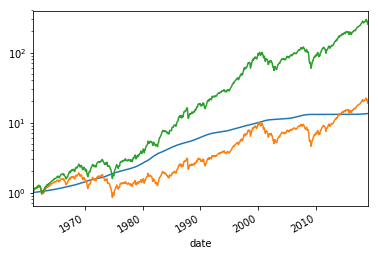

In [75]:
plt.yscale('log')
cumulative_RF_df.plot() #riskfree
cumulative_Mkt_RF_df.plot() #excessMkt
cumulative_Mkt_df.plot() #Mkt

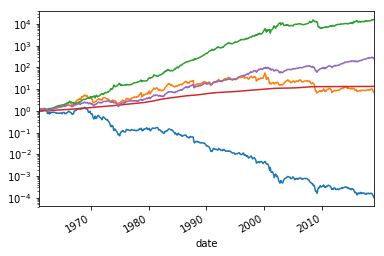

In [76]:
plt.yscale('log')
plt.yscale('log')
cumulative_loser_df.plot() #blue
cumulative_winner_df.plot() #orange
cumulative_momentum_df.plot() #green
cumulative_RF_df.plot() #riskfree #red
#cumulative_Mkt_RF_df.plot() #excessMkt
cumulative_Mkt_df.plot() #Mkt #violet